In [1]:
!pip install transformers

In [2]:
import pandas as pd
import numpy as np
import random
from transformers import ResNetModel
from torch import nn
from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms import v2
import torch

'C:/Users/Alex/Desktop/Universidad/Third Course/First Semester/Vision & Learning/PROJECT 3/flickr8k_partitions.npy/'

'C:/Users/Alex/Desktop/Universidad/Third Course/First Semester/Vision & Learning/PROJECT 3/flickr8k_partitions.npy/'

In [3]:
base_path = 'C:/Users/Alex/Desktop/Universidad/Third Course/First Semester/Vision & Learning/PROJECT 3/'
img_path = f'{base_path}Images/'
cap_path = f'{base_path}captions.txt'
data = pd.read_csv(cap_path)
data.head(n=10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [4]:
item = data.sample(1)
item.image
item = item.reset_index(drop=True)
item.image[0], item.caption[0]

('3442622076_c3abe955e5.jpg',
 'The man surrounded by photographers is wearing a gray suit and glasses .')

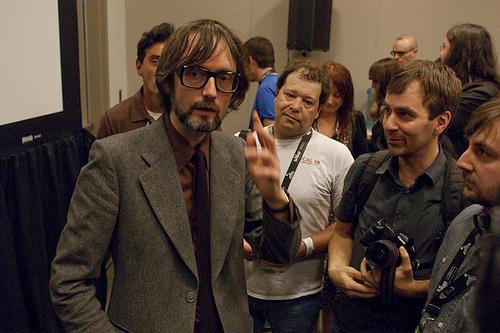

In [5]:
img = Image.open(f'{img_path}{item.image[0]}').convert('RGB')
img

In [6]:
partitions = np.load('flickr8k_partitions.npy', allow_pickle=True).item()

In [7]:
chars = ['<SOS>', '<EOS>', '<PAD>', ' ', '!', '"', '#', '&', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
NUM_CHAR = len(chars)
idx2char = {k: v for k, v in enumerate(chars)}
char2idx = {v: k for k, v in enumerate(chars)}

In [8]:
TEXT_MAX_LEN = 201
DEVICE = 'cuda'

In [9]:
class Data(Dataset):
    def __init__(self, data, partition):
        self.data = data
        self.partition = partition
        self.num_captions = 5
        self.max_len = TEXT_MAX_LEN
        self.img_proc = torch.nn.Sequential(
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Resize((224, 224), antialias=True),
            v2.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),)

    def __len__(self):
        return len(self.partition)
    
    def __getitem__(self, idx):
        real_idx = self.num_captions*self.partition[idx]
        item = self.data.iloc[real_idx: real_idx+self.num_captions]
        ## image processing
        img_name = item.image.reset_index(drop=True)[0]
        img = Image.open(f'{img_path}{img_name}').convert('RGB')
        img = self.img_proc(img)
    
        ## caption processing
        caption = item.caption.reset_index(drop=True)[random.choice(list(range(self.num_captions)))]
        cap_list = list(caption)
        final_list = [chars[0]]
        final_list.extend(cap_list)
        final_list.extend([chars[1]])
        gap = self.max_len - len(final_list)
        final_list.extend([chars[2]]*gap)
        cap_idx = [char2idx[i] for i in final_list]
        return img, cap_idx

In [10]:
dataset = Data(data, partitions['train'])
img1, caption1 = next(iter(dataset))
img2, caption2 = next(iter(dataset))

In [11]:
img1.shape, img2.shape

(torch.Size([3, 224, 224]), torch.Size([3, 224, 224]))

In [12]:
caption1, caption2

([0,
  28,
  3,
  55,
  71,
  68,
  76,
  67,
  3,
  57,
  68,
  60,
  3,
  71,
  74,
  67,
  72,
  3,
  73,
  61,
  71,
  68,
  74,
  60,
  61,
  3,
  73,
  61,
  58,
  3,
  60,
  71,
  54,
  72,
  72,
  3,
  61,
  68,
  65,
  57,
  62,
  67,
  60,
  3,
  72,
  68,
  66,
  58,
  73,
  61,
  62,
  67,
  60,
  3,
  62,
  67,
  3,
  62,
  73,
  72,
  3,
  66,
  68,
  74,
  73,
  61,
  3,
  13,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


In [20]:
# Assuming idx2char dictionary is defined
real_caption1 = [idx2char[idx] for idx in caption1 if idx != char2idx['<PAD>'] and idx != char2idx['<EOS>']]

# Convert the list of characters to a string
real_caption1_str = ''.join(real_caption1)

# Print or use the real caption
print("Real Caption:", real_caption1_str)


Real Caption: <SOS>A brown dog runs through the grass holding something in its mouth .


In [13]:
import numpy as np

# Assuming 'flickr8k_partitions.npy' is in the same directory as your script
partition_path = 'flickr8k_partitions.npy'
partitions = np.load(partition_path, allow_pickle=True).item()


In [14]:
print("Keys in partitions:", partitions.keys())

# Print the first few elements of each split
for split, filenames in partitions.items():
    print(f"{split} split has {len(filenames)} images. First 5 elements:", filenames[:5])


Keys in partitions: dict_keys(['train', 'valid', 'test'])
train split has 5663 images. First 5 elements: [506, 906, 4419, 5465, 7689]
valid split has 809 images. First 5 elements: [631, 2739, 2525, 1236, 3414]
test split has 1619 images. First 5 elements: [250, 3827, 4537, 6430, 6674]


In [15]:
train_filenames = partitions['train']
print("Number of images in the training split:", len(train_filenames))


Number of images in the training split: 5663


In [16]:
partitions.keys()

dict_keys(['train', 'valid', 'test'])

In [26]:


# Load the captions data
captions_path = 'captions.txt'  # Adjust the path
captions_data = pd.read_csv(captions_path, delimiter=',')

# Calculate sentence lengths at both character and word levels
captions_data['char_length'] = captions_data['caption'].apply(len)
captions_data['word_length'] = captions_data['caption'].apply(lambda x: len(x.split()))

# Statistical analysis for sentence lengths
min_char_length = captions_data['char_length'].min()
max_char_length = captions_data['char_length'].max()
mean_char_length = captions_data['char_length'].mean()

min_word_length = captions_data['word_length'].min()
max_word_length = captions_data['word_length'].max()
mean_word_length = captions_data['word_length'].mean()

print("Sentence Lengths (Character Level):")
print(f"  Min: {min_char_length}, Max: {max_char_length}, Mean: {mean_char_length}")

print("\nSentence Lengths (Word Level):")
print(f"  Min: {min_word_length}, Max: {max_word_length}, Mean: {mean_word_length}")

Sentence Lengths (Character Level):
  Min: 1, Max: 199, Mean: 55.134297367445306

Sentence Lengths (Word Level):
  Min: 1, Max: 38, Mean: 11.78259794833766


In [25]:
captions_data

,image,caption
0,"image,caption",NaN
1,"1000268201_693b08cb0e.jpg,A child in a pink dr...",NaN
2,"1000268201_693b08cb0e.jpg,A girl going into a ...",NaN
3,"1000268201_693b08cb0e.jpg,A little girl climbi...",NaN
4,"1000268201_693b08cb0e.jpg,A little girl climbi...",NaN
...,...,...
40451,"997722733_0cb5439472.jpg,A man in a pink shirt...",NaN
40452,"997722733_0cb5439472.jpg,A man is rock climbin...",NaN
40453,"997722733_0cb5439472.jpg,A person in a red shi...",NaN
40454,"997722733_0cb5439472.jpg,A rock climber in a r...",NaN


In [27]:
# Image Size Analysis
image_file_names = ['Images/' + img_name for img_name in captions_data['image'].unique()]

# Calculate image dimensions
image_dimensions = []
for img_path in image_file_names:
    with Image.open(img_path) as img:
        width, height = img.size
        image_dimensions.append({'width': width, 'height': height})

# Convert the list of dictionaries to a DataFrame
image_dimensions_df = pd.DataFrame(image_dimensions)

# Statistical analysis for image dimensions
min_width = image_dimensions_df['width'].min()
max_width = image_dimensions_df['width'].max()
mean_width = image_dimensions_df['width'].mean()

min_height = image_dimensions_df['height'].min()
max_height = image_dimensions_df['height'].max()
mean_height = image_dimensions_df['height'].mean()

print("\nImage Dimensions:")
print(f"  Width: Min={min_width}, Max={max_width}, Mean={mean_width}")
print(f"  Height: Min={min_height}, Max={max_height}, Mean={mean_height}")


Image Dimensions:
  Width: Min=164, Max=500, Mean=457.87220368310466
  Height: Min=127, Max=500, Mean=397.25188481028306


In [29]:
from PIL import Image

def get_aspect_ratio(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        aspect_ratio = width / height
    return aspect_ratio



In [30]:
image_file_names = ['Images/' + img_name for img_name in captions_data['image'].unique()]

for path in image_file_names[:20]:
    aspect_ratio = get_aspect_ratio(path)
    print(f"The aspect ratio of {path} is: {aspect_ratio}")
    

The aspect ratio of Images/1000268201_693b08cb0e.jpg is: 0.75
The aspect ratio of Images/1001773457_577c3a7d70.jpg is: 1.3333333333333333
The aspect ratio of Images/1002674143_1b742ab4b8.jpg is: 1.25
The aspect ratio of Images/1003163366_44323f5815.jpg is: 1.2195121951219512
The aspect ratio of Images/1007129816_e794419615.jpg is: 1.0845986984815619
The aspect ratio of Images/1007320043_627395c3d8.jpg is: 1.5015015015015014
The aspect ratio of Images/1009434119_febe49276a.jpg is: 1.5015015015015014
The aspect ratio of Images/1012212859_01547e3f17.jpg is: 1.4970059880239521
The aspect ratio of Images/1015118661_980735411b.jpg is: 1.3333333333333333
The aspect ratio of Images/1015584366_dfcec3c85a.jpg is: 1.3333333333333333
The aspect ratio of Images/101654506_8eb26cfb60.jpg is: 1.1655011655011656
The aspect ratio of Images/101669240_b2d3e7f17b.jpg is: 1.4005602240896358
The aspect ratio of Images/1016887272_03199f49c4.jpg is: 0.666
The aspect ratio of Images/1019077836_6fc9b15408.jpg is

In [23]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms

class Encoder(nn.Module):
    def __init__(self, embed_size):
        super(Encoder, self).__init__()
        resnet = models.resnet50(pretrained=True)
        # Remove the classification layer (final fully connected layer)
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embed_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, images):
        features = self.resnet(images)
        features = features.view(features.size(0), -1)
        features = self.dropout(self.relu(self.embed(features)))
        return features

# Assuming your image size is 224x224
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# Initialize the encoder
embed_size = 201  # Adjust as needed
encoder = Encoder(embed_size)

# Example usage
image_path = 'Images/667626_18933d713e.jpg'
image = Image.open(image_path).convert('RGB')
image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass through the encoder
with torch.no_grad():
    encoded_image = encoder(image)

# Print the size of the encoded image features
print("Encoded Image Size:", encoded_image.size())


Encoded Image Size: torch.Size([1, 201])
